# Robotic Process Automation in Data Science Life Cycle - Ganesh Ram Gururajan - Livewire Dissertation

In [1]:
# Salaries.csv imported

## Package import preparation

In [1]:
# Importing Packages
import pandas as pd
import numpy as np
import seaborn as sns

# Import statement

## Give Location and target as "location*target"

In [2]:
process = "E:/GPRS/GNS3 IOS/Refactored_Py_DS_ML_Bootcamp-master/04-Pandas-Exercises/Salaries.csv*TotalPay"

In [3]:
#Storing Location of file in a string
location = process.split('*')[0]
location

'E:/GPRS/GNS3 IOS/Refactored_Py_DS_ML_Bootcamp-master/04-Pandas-Exercises/Salaries.csv'

In [4]:
target = process.split('*')[1]
target

'TotalPay'

In [5]:
#Finding the extension of the file
ext = location.split('.')[1]

In [47]:
# Importing Data Accoring to the extension
if ext == 'csv':
    data = pd.read_csv(location)
    print('--reading csv file--')

else:
    data = pd.read_excel(location)
    print('--reading excel file--')

--reading csv file--


In [48]:
print('The shape of the given data is {}'.format(data.shape))

The shape of the given data is (148654, 13)


In [49]:
data.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [50]:
if len(data[target].value_counts().index) < 10:
    ml_needed = 'Classification'
else:
    ml_needed = 'Regression'

print('According to the target column specified {} is need to be performed'.format(ml_needed))

According to the target column specifies Regression is need to be performed


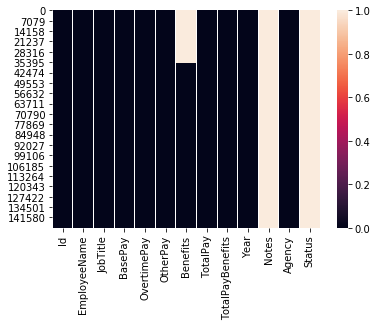

In [11]:
sns.heatmap(data.isnull())

# Data Cleaning

In [54]:
#Storing column names as key and percentage of missing data as corresponding values in a dictionary
missing_dict = {}

no_of_rows = data.shape[0]

for column in data.columns:
    count = data[column].describe()['count']
    missing_ratio = (no_of_rows - count)/no_of_rows
    missing_dict[column] = round(missing_ratio,10)
    
print('--Priting a dictionary with missing values--')
print(missing_dict)

--Priting a dictionary with missing values--
{'Id': 0.0, 'EmployeeName': 0.0, 'JobTitle': 0.0, 'BasePay': 0.0040967616, 'OvertimePay': 2.69081e-05, 'OtherPay': 2.69081e-05, 'Benefits': 0.2432696059, 'TotalPay': 0.0, 'TotalPayBenefits': 0.0, 'Year': 0.0, 'Notes': 1.0, 'Agency': 0.0, 'Status': 1.0}


In [55]:
# Removing columns with 35% or more missing data
highly_missing_features = []
for (column,miss) in missing_dict.items():
    if miss>=0.35:
        highly_missing_features.append(column)

print('--Highly Missing features--')
print(highly_missing_features)

--Highly Missing features--
['Notes', 'Status']


In [56]:
data.drop(highly_missing_features,axis=1,inplace=True)

In [57]:
data.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco


In [58]:
print('--printing data types of features--')
print(data.dtypes)

--printing data types of features--
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Agency               object
dtype: object


In [59]:
#Obtaining Numerical Columns
num_cols = list(data._get_numeric_data().columns)

In [60]:
# Obtaining Categorical columns from removing numerical columns from all columns
cat_cols = list(set(data.columns) - set(num_cols)) 

In [61]:
cat_cols

['Agency', 'JobTitle', 'EmployeeName']

In [63]:
# Finding columns with all rows of unique values or only one unique value
unique_or_no_change_cat_cols = []

for column in cat_cols:
    no_of_values = len(data[column].value_counts().index)
    if no_of_values == no_of_rows or no_of_values == 1:
        unique_or_no_change_cat_cols.append(column)
        
print('--Removing unique or no change columns--')
unique_or_no_change_cat_cols        

--Removing unique or no change columns--


['Agency']

In [64]:
data.drop(unique_or_no_change_cat_cols,axis=1,inplace=True)

In [65]:
data.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011


# Imputation

In [66]:
# To find columns to be imputed from missing dictionary
columns_to_be_imputed = []

for (column,ratio) in missing_dict.items():
    if ratio <0.35 and ratio > 0.1:
        columns_to_be_imputed.append(column)

print('--columns to be imputed--')
columns_to_be_imputed

--columns to be imputed--


['Benefits']

In [25]:
def mean_impute(col):
    if pd.isnull(col):
        return data[column].mean()
    else:
        return col
    
def mode_impute(col):
    if pd.isnull(col):
        return data[column].mode()
    else:
        return col

for column in columns_to_be_imputed:
    if data[column].dtypes == 'float64':
        data[column] = data[column].apply(mean_impute)
        
    if data[column].dtypes == 'O':
        data[column] = data[column].apply(mode_impute)
        
data = data.dropna()

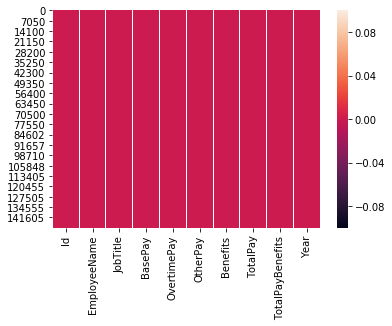

In [26]:
sns.heatmap(data.isnull())

# Dummies

In [27]:
new_num_cols = data._get_numeric_data()

new_cat_cols = list(set(data.columns) - set(new_num_cols))

In [68]:
print('--Encoding newly derived categorical columns--')
new_cat_cols

--Encoding newly derived categorical columns--


['JobTitle', 'EmployeeName']

In [31]:
def get_dummy(col):
    return categories.index(col)

for column in new_cat_cols:
    categories = list(data[column].value_counts().index)
    data[column] = data[column].apply(get_dummy)

# Train test split

In [32]:
X = data.drop(target,axis=1)
y = data[target]

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=100)

# Machine Learning

In [36]:
if ml_needed == 'Classification':
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
    from xgboost import XGBClassifier
    from sklearn.metrics import accuracy_score
    
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    ada = AdaBoostClassifier()
    xgb = XGBClassifier()

In [37]:
if ml_needed == 'Regression':
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
    from xgboost import XGBRegressor
    from sklearn.metrics import mean_absolute_error
    
    dt = DecisionTreeRegressor()
    rf = RandomForestRegressor()
    ada = AdaBoostRegressor()
    xgb = XGBRegressor()

## Fit Function

In [38]:
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
ada.fit(X_train,y_train)
xgb.fit(X_train,y_train)

C:\Users\LIVEWIRE\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\LIVEWIRE\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:01:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

# Prediction

In [39]:
pred1 = dt.predict(X_test)
pred2 = rf.predict(X_test)
pred3 = ada.predict(X_test)
pred4 = xgb.predict(X_test)

In [40]:
algorithms_order = ['DecisionTree','RandomForest','AdaBoost','XGBoost']

# Conclusion

In [42]:
if ml_needed == 'Classification':
    acc1 = accuracy_score(y_test,pred1)
    acc2 = accuracy_score(y_test,pred2)
    acc3 = accuracy_score(y_test,pred3)
    acc4 = accuracy_score(y_test,pred4)
    ml_metrics = [acc1,acc2,acc3,acc4]
    highes_accuracy = max(ml_metrics)
    best_algorithm = algorithms_order[ml_metrics.index(highest_accuracy)]
    print('The Best Algorithm is {} with highest accuracy of {}'.format(best_algorithm,highes_accuracy))

if ml_needed == 'Regression':
    mae1 = mean_absolute_error(y_test,pred1)
    mae2 = mean_absolute_error(y_test,pred2)
    mae3 = mean_absolute_error(y_test,pred3)
    mae4 = mean_absolute_error(y_test,pred4)
    ml_metrics = [mae1,mae2,mae3,mae4]
    min_mae = min(ml_metrics)
    best_algorithm = algorithms_order[ml_metrics.index(min_mae)]
    print('The Best Algorithm is {} with minimum absolute error of {}'.format(best_algorithm,min_mae))

The Best Algorithm is RandomForest with minimum absolute error of 160.65304056447886
